In [2]:
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
os.chdir("/home/piai/문서/2. Big Data 분석")
os.getcwd()
df_raw = pd.read_csv("./IRIS.csv", encoding = 'euc=kr')

In [4]:
# 그래픽 한글폰트 적용
matplotlib.rc("font", family = "NanumGothic")
# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

In [7]:
def fun_data_layout(v_data): 
    print("Data 구조 : ", v_data.shape)
    print()
    
    print("변수 : ", v_data.columns)
    print()

In [8]:
fun_data_layout(df_raw)

Data 구조 :  (150, 5)

변수 :  Index(['SEPAL_LENGTH', 'SEPAL_WIDTH', 'PETAL_LENGTH', 'PETAL_WIDTH',
       'SPECIES'],
      dtype='object')



In [50]:
def diag(x):
    if x == "setosa":
        return 0
    else:
        return 1

In [51]:
df_raw.SPECIES.value_counts(normalize = True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: SPECIES, dtype: float64

In [52]:
df_raw.isnull().sum(axis = 0)

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64

In [53]:
# df_train_raw.SPECIES.value_counts(normalize = True), df_test.SPECIES.value_counts(normalize = True)

In [55]:
df_raw_y = df_raw["SPECIES"]
df_raw_x = df_raw.drop("SPECIES",axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)
print("train dzta X size : {}".format(df_train_x.shape))
print("train dzta Y size : {}".format(df_train_y.shape))
print("test dzta X size : {}".format(df_test_x.shape))
print("test dzta Y size : {}".format(df_test_y.shape))

train dzta X size : (90, 4)
train dzta Y size : (90,)
test dzta X size : (60, 4)
test dzta Y size : (60,)


# 그라디언트 부스팅

In [56]:
gb_uncust = GradientBoostingClassifier(random_state = 1234)
gb_uncust.fit(df_train_x, df_train_y)

print("Train 예측 결과  :\n", gb_uncust.score(df_train_x, df_train_y), "\n")
print("Accuracy: {0:.3f}\n".format(gb_uncust.score(df_test_x, df_test_y)))

Train 예측 결과  :
 1.0 

Accuracy: 0.967



In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
# train_accuracy = []
# test_accuracy = []

# # learning_rate
# para_lr = [lr * 0.1 for lr in range(1,10)]

# for v_learning_rate in para_lr:
#     gb = GradientBoostingClassifier(learning_rate = v_learning_rate, random_state=1234)
#     gb.fit(df_train_x, df_train_y)
#     train_accuracy.append(gb.score(df_train_x, df_train_y))
#     test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# df_accuracy_lr = pd.DataFrame()
# df_accuracy_lr["lr"] = para_lr
# df_accuracy_lr["TrainAccuracy"] = train_accuracy
# df_accuracy_lr["TestAccuracy"] = test_accuracy
# df_accuracy_lr.round(3)

In [15]:
# plt.plot(para_lr,train_accuracy,linestyle = "-",label = "Train accuracy")
# plt.plot(para_lr,test_accuracy,linestyle = "--",label = "Test accuracy")
# plt.ylabel('accuracy')
# plt.xlabel('learning rate')
# plt.legend()

In [16]:
# train_accuracy = []
# test_accuracy = []

# # n_estimators : 트리 수 변경
# para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

# for v_n_estimators in para_n_tree:
#     gb = GradientBoostingClassifier(n_estimators=v_n_estimators, learning_rate = 0.1, random_state = 1234)
#     gb.fit(df_train_x, df_train_y)
#     train_accuracy.append(gb.score(df_train_x, df_train_y))
#     test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# df_accuracy_n = pd.DataFrame()
# df_accuracy_n["n_estimators"] = para_n_tree
# df_accuracy_n["TrainAccuracy"] = train_accuracy
# df_accuracy_n["TestAccuracy"] = test_accuracy
# df_accuracy_n.round(3)

In [17]:
# plt.plot(para_n_tree,train_accuracy,linestyle = "-",label = "Train accuracy")
# plt.plot(para_n_tree,test_accuracy,linestyle = "--",label = "Test accuracy")
# plt.ylabel('accuracy')
# plt.xlabel('n_estimators')
# plt.legend()

In [18]:
# train_accuracy = []
# test_accuracy = []

# # max_depth : 최대 깊이 변경
# para_depth = [depth for depth in range(1,11)]

# for v_max_depth in para_depth:
#     gb = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators=100, learning_rate = 0.1, random_state = 1234)
#     gb.fit(df_train_x, df_train_y)
#     train_accuracy.append(gb.score(df_train_x, df_train_y))
#     test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# df_accuracy_depth = pd.DataFrame()
# df_accuracy_depth["Depth"] = para_depth
# df_accuracy_depth["Trainaccuracy"] = train_accuracy
# df_accuracy_depth["Testaccuracy"] = test_accuracy
# df_accuracy_depth.round(3)

In [19]:
# plt.plot(para_depth,train_accuracy,linestyle = "-",label = "Train accuracy")
# plt.plot(para_depth,test_accuracy,linestyle = "--",label = "Test accuracy")
# plt.ylabel('accuracy')
# plt.xlabel('depth')
# plt.legend()

In [20]:
# train_accuracy = []
# test_accuracy = []

# # min_sample_split : 분할하기 위한 노드의 최소자료 수
# para_split = [n_split * 2 for n_split in range(2,11)]

# for v_min_samples_split in para_split:
#     gb = GradientBoostingClassifier(min_samples_split = v_min_samples_split, max_depth = 6, n_estimators=100, learning_rate = 0.1, random_state = 1234)
#     gb.fit(df_train_x, df_train_y)
#     train_accuracy.append(gb.score(df_train_x, df_train_y))
#     test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# # 결과 저장    
# df_accuracy_split = pd.DataFrame()
# df_accuracy_split["MinSamplesSplit"] = para_split
# df_accuracy_split["Trainaccuracy"] = train_accuracy
# df_accuracy_split["Testaccuracy"] = test_accuracy
# df_accuracy_split.round(3)

In [21]:
# plt.plot(para_split,train_accuracy,linestyle = "-",label = "Train accuracy")
# plt.plot(para_split,test_accuracy,linestyle = "--",label = "Test accuracy")
# plt.ylabel('accuracy')
# plt.xlabel('min samples split')
# plt.legend()

In [22]:
# train_accuracy = []
# test_accuracy = []

# # min_sample_leaf : 잎사귀 노드 최소 자료 수
# para_leaf = [n_leaf * 5 for n_leaf in range(2,11)]

# for v_min_samples_leaf in para_leaf:
#     gb = GradientBoostingClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 6, n_estimators=100, learning_rate = 0.1, random_state = 1234)
#     gb.fit(df_train_x, df_train_y)
#     train_accuracy.append(gb.score(df_train_x, df_train_y))
#     test_accuracy.append(gb.score(df_test_x, df_test_y))
    
# # 결과 저장    
# df_accuracy_leaf = pd.DataFrame()
# df_accuracy_leaf["MinSamplesleaf"] = para_leaf
# df_accuracy_leaf["Trainaccuracy"] = train_accuracy
# df_accuracy_leaf["Testaccuracy"] = test_accuracy
# df_accuracy_leaf.round(3)

In [23]:
# plt.plot(para_split,train_accuracy,linestyle = "-",label = "Train accuracy")
# plt.plot(para_split,test_accuracy,linestyle = "--",label = "Test accuracy")
# plt.ylabel('accuracy')
# plt.xlabel('min samples split')
# plt.legend()

In [59]:
gb_final = GradientBoostingClassifier(min_samples_leaf=15,max_depth=6, n_estimators=100,learning_rate=0.1, random_state=1234 )

gb_final.fit(df_train_x, df_train_y)

y_pred = gb_final.predict(df_test_x)

# train 모델 정확도
print("Accurcy on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))


print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Accurcy on training set: 1.000
Accuracy on test set: 0.967
Confusion matrix: 
[[19  0  0]
 [ 0 22  1]
 [ 0  1 17]]
              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        19
  versicolor      0.957     0.957     0.957        23
   virginica      0.944     0.944     0.944        18

    accuracy                          0.967        60
   macro avg      0.967     0.967     0.967        60
weighted avg      0.967     0.967     0.967        60



In [60]:
# 변수명 저장
v_feature_name = df_train_x.columns


# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,importance
3,PETAL_WIDTH,0.501
2,PETAL_LENGTH,0.488
0,SEPAL_LENGTH,0.008
1,SEPAL_WIDTH,0.003


Text(0, 0.5, '변수')

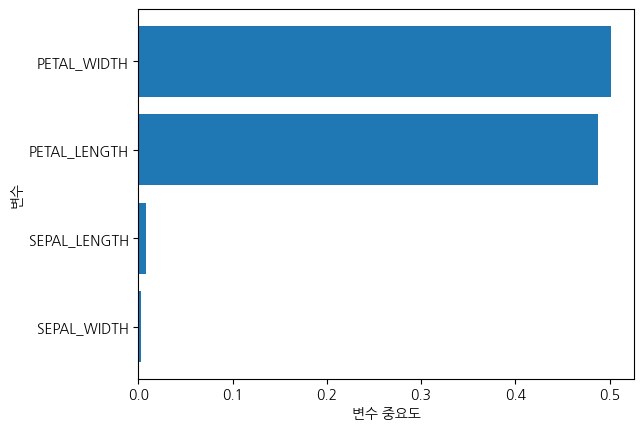

In [61]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {'learning_rate' : para_lr, 'max_depth' : para_depth, 'min_samples_leaf': para_leaf}

gb = GradientBoostingClassifier()

random_gb = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=10, cv=3, scoring="r2", random_state=42)
random_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(random_gb.best_estimator_))
print("\nbest parameter: \n{}".format(random_gb.best_params_))
print("\nbest score: \n{}".format(random_gb.best_score_.round(3)))


NameError: name 'para_lr' is not defined

# 확장 XG Boost  p.129 ~ p.134

In [37]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [44]:
import os
os.chdir("/home/piai/문서/2. Big Data 분석")
os.getcwd()
df_raw = pd.read_csv("./IRIS.csv", encoding = 'euc=kr')

In [45]:
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도:{:.4f}'.format(accuracy))
    print('정밀도:{:.4f}'.format(precision))   
    print('재현율:{:.4f}'.format(recall))
    print('F1:{:.4f}'.format(F1))
    print('AUC:{:.4f}'.format(AUC))

In [63]:
def diag(x):
    if x == "setosa":
        return 0
    else:
        return 1
df_raw['SPECIES'] = df_raw['SPECIES'].apply(diag)
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [64]:
df_raw_y = df_raw["SPECIES"]
df_raw_x = df_raw.drop("SPECIES",axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.4,
                                                                random_state=1234)
print("train dzta X size : {}".format(df_train_x.shape))
print("train dzta Y size : {}".format(df_train_y.shape))
print("test dzta X size : {}".format(df_test_x.shape))
print("test dzta Y size : {}".format(df_test_y.shape))

train dzta X size : (90, 4)
train dzta Y size : (90,)
test dzta X size : (60, 4)
test dzta Y size : (60,)


In [65]:
xg_boost_uncust = XGBClassifier(random_state=1234)
xg_boost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1234, ...)

In [66]:
xg_boost_uncust.fit(df_train_x, df_train_y)

print('\n 모델 생성 및 평가 : Train\n')
xgb_pred_train = xg_boost_uncust.predict(df_train_x)
eval_class_model(df_train_y, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test\n')
xgb_pred_test = xg_boost_uncust.predict(df_test_x)
eval_class_model(df_test_y, xgb_pred_test)


 모델 생성 및 평가 : Train

오차행렬:
 [[31  0]
 [ 0 59]] 

정확도:1.0000
정밀도:1.0000
재현율:1.0000
F1:1.0000
AUC:1.0000

 모델 생성 및 평가 : Test

오차행렬:
 [[19  0]
 [ 0 41]] 

정확도:1.0000
정밀도:1.0000
재현율:1.0000
F1:1.0000
AUC:1.0000


In [67]:
# 사용자 모델 생성
xgboost_user = XGBClassifier(n_estimators=100, learning_rate = 0.1, max_depth = 5, random_state = 1234)

#모델 적합
xgboost_user.fit(df_train_x, df_train_y)

xgb_pred_train = xgboost_user.predict(df_train_x)

print('\b 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, xgb_pred_train)
print('\n', classification_report(df_train_y, xgb_pred_train))

xgb_pred_test = xgboost_user.predict(df_test_x)\

print('\b 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_test)
print('\n', classification_report(df_test_y, xgb_pred_test))

 사용자 모델 평가 : Train 

오차행렬:
 [[31  0]
 [ 0 59]] 

정확도:1.0000
정밀도:1.0000
재현율:1.0000
F1:1.0000
AUC:1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        59

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

 사용자 모델 평가 : Test 

오차행렬:
 [[19  0]
 [ 0 41]] 

정확도:1.0000
정밀도:1.0000
재현율:1.0000
F1:1.0000
AUC:1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        41

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [68]:
eval_df = [(df_test_x, df_test_y)]
xgb_stop = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=1234)
xgb_stop.fit(df_train_x, df_train_y, early_stopping_rounds=150, eval_metric='logloss', eval_set= eval_df, verbose=True)

print('최적횟수 : ', xgb_stop.best_iteration)
print('최적성능(0-LogLoss)', xgb_stop.best_score)

[0]	validation_0-logloss:0.60534
[1]	validation_0-logloss:0.53233
[2]	validation_0-logloss:0.47074
[3]	validation_0-logloss:0.41819
[4]	validation_0-logloss:0.37296
[5]	validation_0-logloss:0.33374
[6]	validation_0-logloss:0.29953
[7]	validation_0-logloss:0.26953
[8]	validation_0-logloss:0.24312
[9]	validation_0-logloss:0.21978
[10]	validation_0-logloss:0.19908
[11]	validation_0-logloss:0.18068
[12]	validation_0-logloss:0.16429
[13]	validation_0-logloss:0.14964
[14]	validation_0-logloss:0.13653
[15]	validation_0-logloss:0.12478
[16]	validation_0-logloss:0.11423
[17]	validation_0-logloss:0.10474
[18]	validation_0-logloss:0.09619
[19]	validation_0-logloss:0.08848
[20]	validation_0-logloss:0.08152
[21]	validation_0-logloss:0.07522
[22]	validation_0-logloss:0.06952
[23]	validation_0-logloss:0.06436
[24]	validation_0-logloss:0.05968
[25]	validation_0-logloss:0.05542
[26]	validation_0-logloss:0.05155
[27]	validation_0-logloss:0.04803
[28]	validation_0-logloss:0.04482
[29]	validation_0-loglos

[238]	validation_0-logloss:0.02241
[239]	validation_0-logloss:0.02241
[240]	validation_0-logloss:0.02241
[241]	validation_0-logloss:0.02241
[242]	validation_0-logloss:0.02241
[243]	validation_0-logloss:0.02241
[244]	validation_0-logloss:0.02241
[245]	validation_0-logloss:0.02241
[246]	validation_0-logloss:0.02241
[247]	validation_0-logloss:0.02241
[248]	validation_0-logloss:0.02241
[249]	validation_0-logloss:0.02241
[250]	validation_0-logloss:0.02241
[251]	validation_0-logloss:0.02241
[252]	validation_0-logloss:0.02241
[253]	validation_0-logloss:0.02241
[254]	validation_0-logloss:0.02241
[255]	validation_0-logloss:0.02241
[256]	validation_0-logloss:0.02241
[257]	validation_0-logloss:0.02241
[258]	validation_0-logloss:0.02241
[259]	validation_0-logloss:0.02241
[260]	validation_0-logloss:0.02241
[261]	validation_0-logloss:0.02241
[262]	validation_0-logloss:0.02241
[263]	validation_0-logloss:0.02241
[264]	validation_0-logloss:0.02241
[265]	validation_0-logloss:0.02241
[266]	validation_0-l

In [69]:
xgb_pred_stop = xgb_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, xgb_pred_stop)
print('\n', classification_report(df_test_y, xgb_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[19  0]
 [ 0 41]] 

정확도:1.0000
정밀도:1.0000
재현율:1.0000
F1:1.0000
AUC:1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        41

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



{'PETAL_LENGTH': 39.0, 'PETAL_WIDTH': 2.0}


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

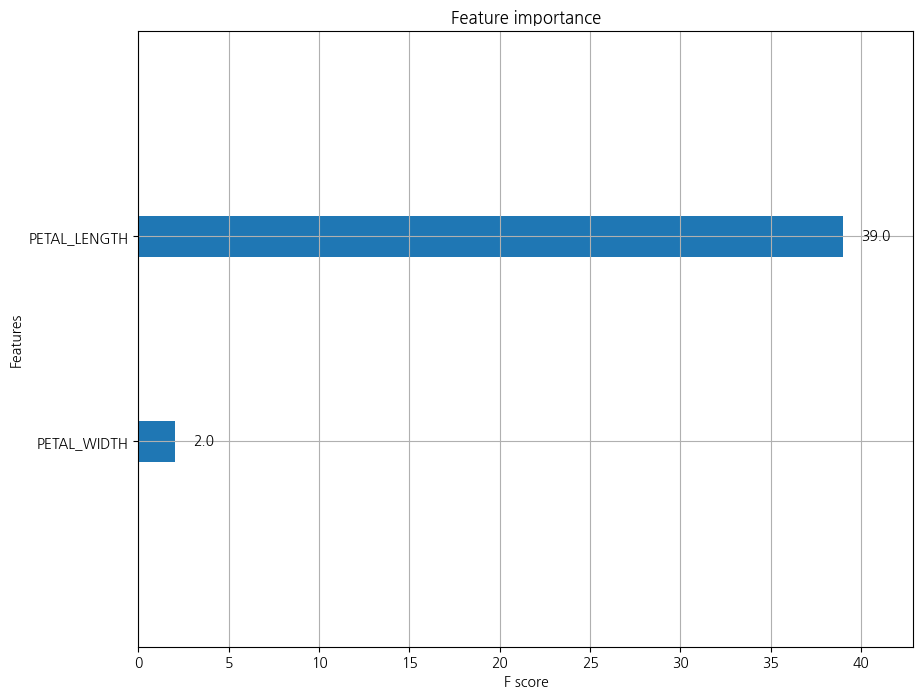

In [70]:
from xgboost import plot_importance
print(xgb_stop.get_booster().get_fscore())

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_stop, ax=ax)

# LightGBM

In [71]:
!pip install lightgbm

In [72]:
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도:{:.4f}'.format(accuracy))
    print('정밀도:{:.4f}'.format(precision))   
    print('재현율:{:.4f}'.format(recall))
    print('F1:{:.4f}'.format(F1))
    print('AUC:{:.4f}'.format(AUC))

In [73]:
from lightgbm import LGBMClassifier

from lightgbm import plot_importance

In [74]:
lgbm_uncust = LGBMClassifier(random_state = 1234)

lgbm_uncust.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1234,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [75]:
lgbm_user = LGBMClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 6, random_state = 1234)

lgbm_user.fit(df_train_x, df_train_y)

lgbm_pred_train = lgbm_user.predict(df_train_x)


print('\n 사용자 모델 평가 : Train \n')
eval_class_model(df_train_y, lgbm_pred_train)
print('\n',classification_report(df_train_y, lgbm_pred_train))

lgbm_pred_test = lgbm_user.predict(df_test_x)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_test)
print('\n',classification_report(df_test_y, lgbm_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[31  0]
 [ 0 59]] 

정확도:1.0000
정밀도:1.0000
재현율:1.0000
F1:1.0000
AUC:1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        59

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90


 사용자 모델 평가 : Test 

오차행렬:
 [[19  0]
 [ 0 41]] 

정확도:1.0000
정밀도:1.0000
재현율:1.0000
F1:1.0000
AUC:1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        41

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [76]:
eval_df = [(df_test_x, df_test_y)]
lgbm_stop = LGBMClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 6, random_state = 1234)
lgbm_stop.fit(df_train_x, df_train_y, early_stopping_rounds = 150, eval_metric = "logloss", eval_set = eval_df, verbose = True)

print("최적 횟수: ", lgbm_stop.best_iteration_)
print("최적 성능(0-LogLoss): ", lgbm_stop.best_score_)

[1]	valid_0's binary_logloss: 0.54099
[2]	valid_0's binary_logloss: 0.472964
[3]	valid_0's binary_logloss: 0.417584
[4]	valid_0's binary_logloss: 0.37093
[5]	valid_0's binary_logloss: 0.331484
[6]	valid_0's binary_logloss: 0.30019
[7]	valid_0's binary_logloss: 0.270136
[8]	valid_0's binary_logloss: 0.246835
[9]	valid_0's binary_logloss: 0.223196
[10]	valid_0's binary_logloss: 0.202174
[11]	valid_0's binary_logloss: 0.186291
[12]	valid_0's binary_logloss: 0.169513
[13]	valid_0's binary_logloss: 0.154658
[14]	valid_0's binary_logloss: 0.143613
[15]	valid_0's binary_logloss: 0.130973
[16]	valid_0's binary_logloss: 0.119548
[17]	valid_0's binary_logloss: 0.111709
[18]	valid_0's binary_logloss: 0.102235
[19]	valid_0's binary_logloss: 0.093621
[20]	valid_0's binary_logloss: 0.0879853
[21]	valid_0's binary_logloss: 0.0807486
[22]	valid_0's binary_logloss: 0.0741381
[23]	valid_0's binary_logloss: 0.0700521
[24]	valid_0's binary_logloss: 0.0644383
[25]	valid_0's binary_logloss: 0.0592924
[26]	v

In [77]:
lgbm_pred_stop = lgbm_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test \n')
eval_class_model(df_test_y, lgbm_pred_stop)
print('\n',classification_report(df_test_y, lgbm_pred_stop))


 조기 중단 모델 평가 : Test 

오차행렬:
 [[19  0]
 [ 0 41]] 

정확도:1.0000
정밀도:1.0000
재현율:1.0000
F1:1.0000
AUC:1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        41

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



['SEPAL_LENGTH', 'SEPAL_WIDTH', 'PETAL_LENGTH', 'PETAL_WIDTH']
[ 59 342 116  88]


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

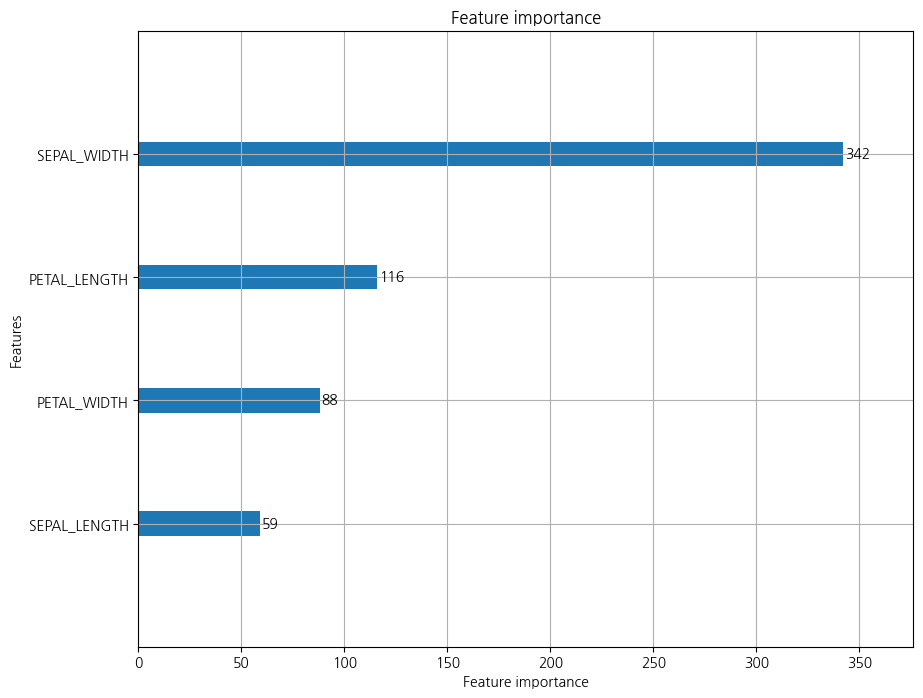

In [78]:
from lightgbm import plot_importance
print(lgbm_stop.feature_name_)
print(lgbm_stop.feature_importances_)
fig, ax = plt.subplots(figsize = (10, 8))
plot_importance(lgbm_stop, ax = ax)

# Cat Boost

In [79]:
# 141쪽
# 패키지 불러오기
from catboost import CatBoostClassifier

# 변수 중요도 확인: CatBoost는 plot_importance 함수 미지원

In [80]:
# 142쪽
# 기본 모델 및 parameter 확인
cbc_uncust = CatBoostClassifier(random_state=1234)

# 모델 적합
cbc_uncust.fit(df_train_x, df_train_y)

# 예측 및 모델 평가 train
print('\n 모델 생성 및 평가 : Train \n')
cbc_pred_train = cbc_uncust.predict(df_train_x)
eval_class_model(df_train_y, cbc_pred_train)

# 예측 및 모델 평가: test
print('\n 모델 생성 및 평가 : Test \n')
cbc_pred_test = cbc_uncust.predict(df_test_x)
eval_class_model(df_test_y, cbc_pred_test)

Learning rate set to 0.003685
0:	learn: 0.6870827	total: 48.2ms	remaining: 48.2s
1:	learn: 0.6811331	total: 50.1ms	remaining: 25s
2:	learn: 0.6744208	total: 52.6ms	remaining: 17.5s
3:	learn: 0.6684122	total: 54ms	remaining: 13.4s
4:	learn: 0.6626920	total: 55.1ms	remaining: 11s
5:	learn: 0.6565822	total: 56.2ms	remaining: 9.31s
6:	learn: 0.6497529	total: 57.5ms	remaining: 8.15s
7:	learn: 0.6432002	total: 58.3ms	remaining: 7.22s
8:	learn: 0.6366771	total: 59ms	remaining: 6.5s
9:	learn: 0.6314205	total: 59.7ms	remaining: 5.91s
10:	learn: 0.6263138	total: 60.5ms	remaining: 5.44s
11:	learn: 0.6194832	total: 61.3ms	remaining: 5.05s
12:	learn: 0.6129384	total: 61.9ms	remaining: 4.7s
13:	learn: 0.6075611	total: 62.7ms	remaining: 4.42s
14:	learn: 0.6020097	total: 63.5ms	remaining: 4.17s
15:	learn: 0.5963326	total: 64.5ms	remaining: 3.96s
16:	learn: 0.5912182	total: 65.3ms	remaining: 3.78s
17:	learn: 0.5856260	total: 66.1ms	remaining: 3.61s
18:	learn: 0.5801669	total: 66.8ms	remaining: 3.45s
19

228:	learn: 0.1085756	total: 186ms	remaining: 626ms
229:	learn: 0.1080093	total: 187ms	remaining: 625ms
230:	learn: 0.1073987	total: 187ms	remaining: 624ms
231:	learn: 0.1066714	total: 188ms	remaining: 622ms
232:	learn: 0.1058934	total: 189ms	remaining: 621ms
233:	learn: 0.1053060	total: 189ms	remaining: 619ms
234:	learn: 0.1046988	total: 190ms	remaining: 617ms
235:	learn: 0.1037090	total: 190ms	remaining: 615ms
236:	learn: 0.1031014	total: 191ms	remaining: 614ms
237:	learn: 0.1024574	total: 191ms	remaining: 612ms
238:	learn: 0.1017014	total: 192ms	remaining: 610ms
239:	learn: 0.1010437	total: 192ms	remaining: 608ms
240:	learn: 0.1005578	total: 193ms	remaining: 607ms
241:	learn: 0.0999651	total: 193ms	remaining: 605ms
242:	learn: 0.0990602	total: 194ms	remaining: 603ms
243:	learn: 0.0983988	total: 194ms	remaining: 602ms
244:	learn: 0.0978546	total: 195ms	remaining: 600ms
245:	learn: 0.0973368	total: 195ms	remaining: 599ms
246:	learn: 0.0968076	total: 196ms	remaining: 597ms
247:	learn: 

530:	learn: 0.0279034	total: 365ms	remaining: 323ms
531:	learn: 0.0278034	total: 366ms	remaining: 322ms
532:	learn: 0.0277202	total: 367ms	remaining: 321ms
533:	learn: 0.0276371	total: 367ms	remaining: 320ms
534:	learn: 0.0275615	total: 368ms	remaining: 320ms
535:	learn: 0.0274955	total: 368ms	remaining: 319ms
536:	learn: 0.0274112	total: 369ms	remaining: 318ms
537:	learn: 0.0273401	total: 369ms	remaining: 317ms
538:	learn: 0.0272494	total: 370ms	remaining: 316ms
539:	learn: 0.0271787	total: 371ms	remaining: 316ms
540:	learn: 0.0271013	total: 371ms	remaining: 315ms
541:	learn: 0.0270291	total: 372ms	remaining: 314ms
542:	learn: 0.0269328	total: 372ms	remaining: 313ms
543:	learn: 0.0268686	total: 373ms	remaining: 312ms
544:	learn: 0.0267939	total: 373ms	remaining: 312ms
545:	learn: 0.0267116	total: 374ms	remaining: 311ms
546:	learn: 0.0266370	total: 374ms	remaining: 310ms
547:	learn: 0.0265651	total: 375ms	remaining: 309ms
548:	learn: 0.0264811	total: 375ms	remaining: 308ms
549:	learn: 

852:	learn: 0.0129411	total: 545ms	remaining: 94ms
853:	learn: 0.0129257	total: 546ms	remaining: 93.4ms
854:	learn: 0.0128989	total: 547ms	remaining: 92.7ms
855:	learn: 0.0128777	total: 547ms	remaining: 92.1ms
856:	learn: 0.0128275	total: 548ms	remaining: 91.4ms
857:	learn: 0.0128015	total: 548ms	remaining: 90.7ms
858:	learn: 0.0127773	total: 549ms	remaining: 90ms
859:	learn: 0.0127549	total: 549ms	remaining: 89.4ms
860:	learn: 0.0127292	total: 550ms	remaining: 88.7ms
861:	learn: 0.0127094	total: 550ms	remaining: 88.1ms
862:	learn: 0.0126921	total: 551ms	remaining: 87.4ms
863:	learn: 0.0126661	total: 551ms	remaining: 86.8ms
864:	learn: 0.0126447	total: 552ms	remaining: 86.1ms
865:	learn: 0.0126144	total: 552ms	remaining: 85.5ms
866:	learn: 0.0125954	total: 553ms	remaining: 84.8ms
867:	learn: 0.0125735	total: 554ms	remaining: 84.2ms
868:	learn: 0.0125493	total: 554ms	remaining: 83.5ms
869:	learn: 0.0125295	total: 555ms	remaining: 82.9ms
870:	learn: 0.0125132	total: 555ms	remaining: 82.2

In [81]:
# 143쪽
# 사용자 모델 생성
cbc_user = CatBoostClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 6, random_state=1234)

# 모델 적합
cbc_user.fit(df_train_x, df_train_y)

# 예측 및 모델 평가: Train
cbc_pred_train = cbc_user.predict(df_train_x)

print('\n 모델 생성 및 평가 : Train \n')
eval_class_model(df_train_y, cbc_pred_train)
print('\n', classification_report(df_train_y, cbc_pred_train))

# 예측 및 모델 평가: Test
cbc_pred_test = cbc_user.predict(df_test_x)

print('\n 모델 생성 및 평가 : Test \n')
eval_class_model(df_test_y, cbc_pred_test)
print('\n', classification_report(df_test_y, cbc_pred_test))

0:	learn: 0.5422313	total: 1.64ms	remaining: 327ms
1:	learn: 0.4287982	total: 3.22ms	remaining: 319ms
2:	learn: 0.3317662	total: 4.54ms	remaining: 298ms
3:	learn: 0.2658430	total: 5.47ms	remaining: 268ms
4:	learn: 0.2192951	total: 6.4ms	remaining: 250ms
5:	learn: 0.1794015	total: 7.27ms	remaining: 235ms
6:	learn: 0.1375756	total: 7.92ms	remaining: 218ms
7:	learn: 0.1173505	total: 8.84ms	remaining: 212ms
8:	learn: 0.0982877	total: 9.76ms	remaining: 207ms
9:	learn: 0.0833508	total: 10.8ms	remaining: 205ms
10:	learn: 0.0719188	total: 11.7ms	remaining: 200ms
11:	learn: 0.0616182	total: 12.5ms	remaining: 196ms
12:	learn: 0.0543005	total: 13.4ms	remaining: 193ms
13:	learn: 0.0469552	total: 14.1ms	remaining: 187ms
14:	learn: 0.0406283	total: 14.6ms	remaining: 180ms
15:	learn: 0.0363615	total: 15.3ms	remaining: 176ms
16:	learn: 0.0321404	total: 15.9ms	remaining: 171ms
17:	learn: 0.0298323	total: 16.5ms	remaining: 167ms
18:	learn: 0.0262156	total: 17.1ms	remaining: 163ms
19:	learn: 0.0245468	to

In [84]:
# 144쪽
eval_df = [(df_test_x, df_test_y)]
cbc_stop = CatBoostClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=1234)
cbc_stop.fit(df_train_x, df_train_y, early_stopping_rounds=150, eval_set=eval_df, verbose=True)

print("최적 횟수:", cbc_stop.bst_iteration_)
print("최적 성능(0-LogLoss):", cbc_stop.best_score_)

0:	learn: 0.5422313	test: 0.5437605	best: 0.5437605 (0)	total: 1.99ms	remaining: 596ms
1:	learn: 0.4287982	test: 0.4293381	best: 0.4293381 (1)	total: 3.81ms	remaining: 568ms
2:	learn: 0.3317662	test: 0.3504767	best: 0.3504767 (2)	total: 5.32ms	remaining: 527ms
3:	learn: 0.2658430	test: 0.2867431	best: 0.2867431 (3)	total: 6.93ms	remaining: 513ms
4:	learn: 0.2192951	test: 0.2435722	best: 0.2435722 (4)	total: 8.39ms	remaining: 495ms
5:	learn: 0.1794015	test: 0.2015535	best: 0.2015535 (5)	total: 9.65ms	remaining: 473ms
6:	learn: 0.1375756	test: 0.1564159	best: 0.1564159 (6)	total: 10.7ms	remaining: 446ms
7:	learn: 0.1173505	test: 0.1363984	best: 0.1363984 (7)	total: 12ms	remaining: 438ms
8:	learn: 0.0982877	test: 0.1147134	best: 0.1147134 (8)	total: 13.3ms	remaining: 430ms
9:	learn: 0.0833508	test: 0.0977614	best: 0.0977614 (9)	total: 15.7ms	remaining: 457ms
10:	learn: 0.0719188	test: 0.0863532	best: 0.0863532 (10)	total: 16.9ms	remaining: 444ms
11:	learn: 0.0616182	test: 0.0743898	best: 

AttributeError: 'CatBoostClassifier' object has no attribute 'bst_iteration_'

In [87]:
# 145쪽
cbc_pred_stop = cbc_stop.predict(df_test_x)

print('\n 조기 중단 모델 평가 : Test\n')
eval_class_model(df_test_y, cbc_pred_stop)
print('\n', classification_report(df_test_y, cbc_pred_stop))


 조기 중단 모델 평가 : Test

오차행렬:
 [[19  0]
 [ 0 41]] 

정확도:1.0000
정밀도:1.0000
재현율:1.0000
F1:1.0000
AUC:1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        41

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [88]:
# 146쪽
print(cbc_stop.feature_names_)
print(cbc_stop.feature_importances_)

df_cbc_importance = pd.DataFrame()
df_cbc_importance['Feature'] = cbc_stop.feature_names_
df_cbc_importance['Importance'] = cbc_stop.feature_importances_

df_cbc_importance.sort_values("Importance", ascending=False, inplace=True)
df_cbc_importance.round(3)

['SEPAL_LENGTH', 'SEPAL_WIDTH', 'PETAL_LENGTH', 'PETAL_WIDTH']
[ 6.98881532  7.31215026 58.51873549 27.18029893]


,Feature,Importance
2,PETAL_LENGTH,58.519
3,PETAL_WIDTH,27.180
1,SEPAL_WIDTH,7.312
0,SEPAL_LENGTH,6.989


Text(0, 0.5, '설명변수')

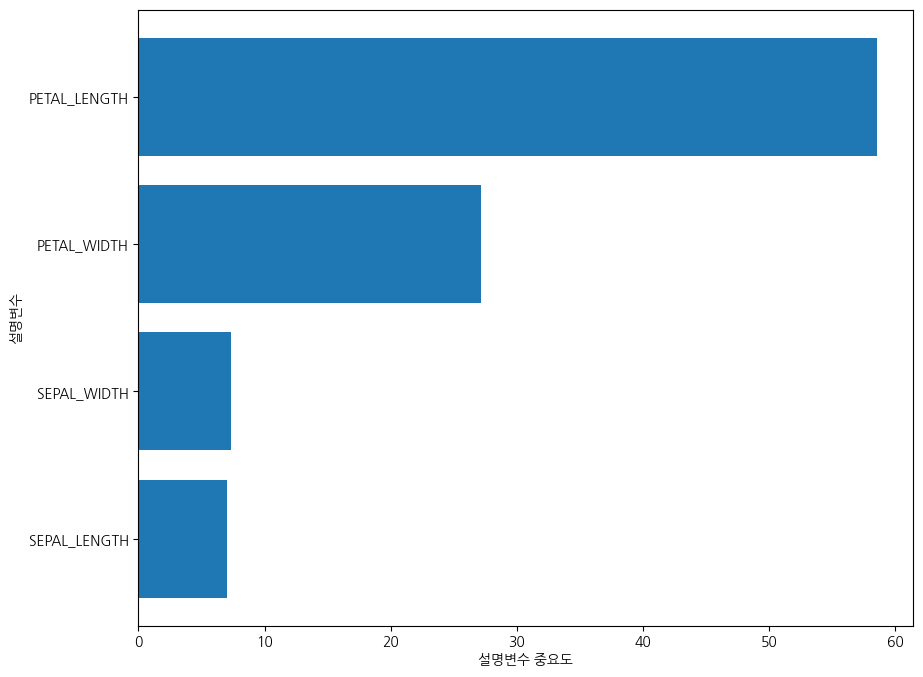

In [89]:
# 147쪽
fig, ax = plt.subplots(figsize=(10,8))
df_cbc_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_cbc_importance))
plt.barh(y=coordinates, width=df_cbc_importance["Importance"])
plt.yticks(coordinates, df_cbc_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")